In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1
import numpy as np


from keras.regularizers import l2
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers

In [2]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 512

train_data_dir = './DataSet/train/'
validation_data_dir = './DataSet/test/'

In [10]:
# Let's use some data augmentaiton 
# train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=10,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      )
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
#         color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
#         color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 4394 images belonging to 7 classes.


In [4]:
print(validation_generator.class_indices)

{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [5]:


def mini_XCEPTION(input_shape, num_classes, l2_regularization=0.01):
    regularization = l2(l2_regularization)

    # base
    img_input = Input(input_shape)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
               use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # module 1
    residual = Conv2D(16, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 2
    residual = Conv2D(32, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 3
    residual = Conv2D(64, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    
    
    x = Activation('relu')(x)
    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 4
    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    
    

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    x = Conv2D(num_classes, (3, 3),
               # kernel_regularizer=regularization,
               padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('softmax', name='predictions')(x)

    model = Model(img_input, output)
    return model

model = mini_XCEPTION((48, 48, 3), num_classes=7)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 46, 46, 8)    216         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 46, 46, 8)   32          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 46, 46, 8)    0           ['batch_normalization[0][0]']

In [6]:
# If you want to train the same model or try other models, go for this


filepath = os.path.join("./emotion_detector_models/model_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=False,
                                             mode='max')
callbacks = [checkpoint]
# if mode == "train":
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
nb_train_samples = 28709
nb_validation_samples = 3589
epochs = 100
model_info = model.fit(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

# plot_model_history(model_info)
# model.save_weights('model.h5')

C:\Users\1ravi\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
56/56 [==============================] - ETA: 0s - loss: 2.1093 - accuracy: 0.2184
Epoch 1: saving model to ./emotion_detector_models\model_1.hdf5
56/56 [==============================] - 38s 577ms/step - loss: 2.1093 - accuracy: 0.2184 - val_loss: 2.1531 - val_accuracy: 0.1886
Epoch 2/100
56/56 [==============================] - ETA: 0s - loss: 2.0180 - accuracy: 0.2475
Epoch 2: saving model to ./emotion_detector_models\model_2.hdf5
56/56 [==============================] - 29s 504ms/step - loss: 2.0180 - accuracy: 0.2475 - val_loss: 2.1754 - val_accuracy: 0.1922
Epoch 3/100
56/56 [==============================] - ETA: 0s - loss: 1.9950 - accuracy: 0.2653
Epoch 3: saving model to ./emotion_detector_models\model_3.hdf5
56/56 [==============================] - 29s 518ms/step - loss: 1.9950 - accuracy: 0.2653 - val_loss: 2.1913 - val_accuracy: 0.1925
Epoch 4/100
56/56 [==============================] - ETA: 0s - loss: 1.9773 - accuracy: 0.2724
Epoch 4: saving model to ./emoti

NameError: name 'plot_model_history' is not defined

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


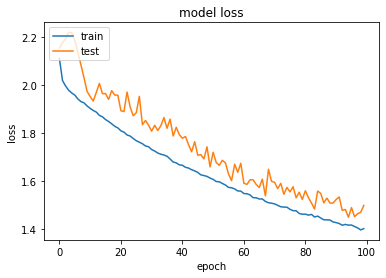

In [7]:
print(model_info.history.keys())

import matplotlib.pyplot as plt
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model.load_weights(os.path.join("./emotion_detector_models/model_100.hdf5"))

In [13]:
model_info = model.fit(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=150,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/150
56/56 [==============================] - ETA: 0s - loss: 1.1335 - accuracy: 0.5903
Epoch 1: saving model to ./emotion_detector_models\model_1.hdf5
56/56 [==============================] - 31s 538ms/step - loss: 1.1335 - accuracy: 0.5903 - val_loss: 1.3401 - val_accuracy: 0.4961
Epoch 2/150
56/56 [==============================] - ETA: 0s - loss: 1.1323 - accuracy: 0.5897
Epoch 2: saving model to ./emotion_detector_models\model_2.hdf5
56/56 [==============================] - 31s 553ms/step - loss: 1.1323 - accuracy: 0.5897 - val_loss: 1.2613 - val_accuracy: 0.5290
Epoch 3/150
56/56 [==============================] - ETA: 0s - loss: 1.1308 - accuracy: 0.5884
Epoch 3: saving model to ./emotion_detector_models\model_3.hdf5
56/56 [==============================] - 30s 534ms/step - loss: 1.1308 - accuracy: 0.5884 - val_loss: 1.2934 - val_accuracy: 0.5190
Epoch 4/150
56/56 [==============================] - ETA: 0s - loss: 1.1292 - accuracy: 0.5901
Epoch 4: saving model to ./emoti

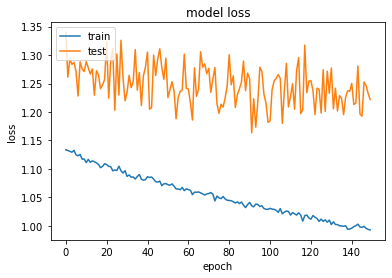

In [14]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.load_weights(os.path.join("./emotion_detector_models/model_146.hdf5"))

Found 4394 images belonging to 7 classes.


<ipython-input-16-51eb68c41a1e>:28: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)


Confusion Matrix
[[ 59   1  11   7   9  18   1]
 [ 33  36  11   7   3  17   4]
 [101   4 317  38 117 189  77]
 [ 22   0  30 502  27  23   7]
 [ 66   5  80  97 728 191  13]
 [118   8 144  73 240 600  18]
 [ 10   0  52  14  13  10 243]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.56      0.23       106
   disgusted       0.67      0.32      0.44       111
     fearful       0.49      0.38      0.43       843
       happy       0.68      0.82      0.74       611
     neutral       0.64      0.62      0.63      1180
         sad       0.57      0.50      0.53      1201
   surprised       0.67      0.71      0.69       342

    accuracy                           0.57      4394
   macro avg       0.55      0.56      0.53      4394
weighted avg       0.59      0.57      0.57      4394



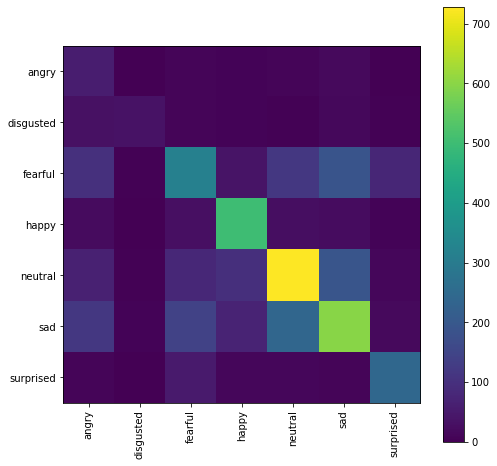

In [16]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Found 28709 images belonging to 7 classes.
# Found 3589 images belonging to 7 classes.


# nb_train_samples = 28273
# nb_validation_samples = 3534
nb_train_samples = 28709
nb_validation_samples = 4394

# We need to recreate our validation generator with shuffle = false
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        
        target_size=(48, 48),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [17]:
from keras.models import load_model

classifier = load_model('./emotion_detector_models/model_146.hdf5')

In [18]:
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
#         color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 4394 images belonging to 7 classes.
{0: 'angry', 1: 'disgusted', 2: 'fearful', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprised'}


In [19]:
from keras.models import load_model
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re
from tensorflow.keras.utils import load_img, img_to_array

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image=im
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return load_img(final_path, target_size = (img_width, img_height,3),grayscale=False), final_path, path_class

# dimensions of our images
img_width, img_height = 48, 48

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = './DataSet/test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[np.argmax(predictions[i][0])], image, true_labels[i])
    print("Prediction", class_labels[np.argmax(predictions[i][0])], true_labels[i])
    
    cv2.waitKey(0)

cv2.destroyAllWindows()

C:\Users\1ravi\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 16ms/step
Prediction happy happy
Prediction surprised surprised
Prediction sad happy
Prediction neutral neutral
Prediction fearful fearful
Prediction sad sad
Prediction angry angry
Prediction neutral neutral
Prediction disgusted disgusted
Prediction sad sad
